# Group 1 Complete Project

## Unsupervised Learning

In [ ]:
# Load neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
file_path = "D:/Assignments/imdb_movie_dataset (2).csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# Remove the target labels and text columns that are not used for clustering.
# Here we drop 'Rating' and other non-numeric columns.
df_clustering = df.drop(columns=['Rating', 'Title', 'Genre', 'Description', 'Director', 'Actors'], errors='ignore')

# Drop rows with any missing values
df_clustering = df_clustering.dropna()

In [ ]:
# Feature Selection and Scaling
# ===============================

# At this point, df_clustering should contain only numeric columns (e.g., Rank, Year, Runtime, Votes, Revenue, Metascore)
print("Columns used for clustering:", df_clustering.columns.tolist())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

Columns used for clustering: ['Rank', 'Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

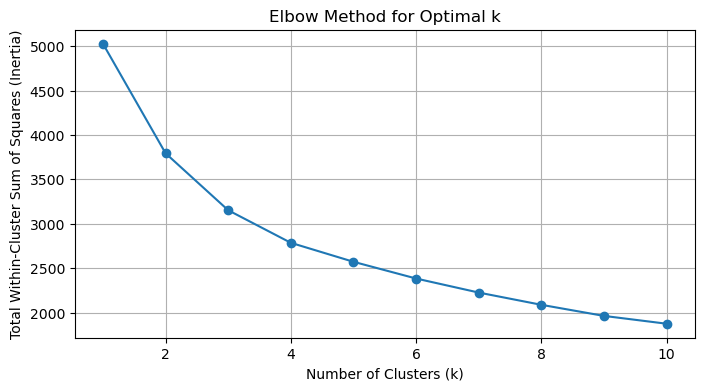

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Apply KMeans Clustering
# ===============================

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    km_temp = KMeans(n_clusters=k, random_state=42)
    km_temp.fit(X_scaled)
    inertia.append(km_temp.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose an optimal k (for example, k = 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the cleaned DataFrame
df_clustering['Cluster'] = clusters


In [ ]:
# Clustering Evaluation
# ===============================

# Compute Silhouette Coefficient to evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Coefficient:", silhouette_avg)

# Total within-cluster sum of squares is given by inertia
total_inertia = kmeans.inertia_
print("Total within-cluster sum of squares (Inertia):", total_inertia)


Silhouette Coefficient: 0.2039677820810192
Total within-cluster sum of squares (Inertia): 3152.2049779908284


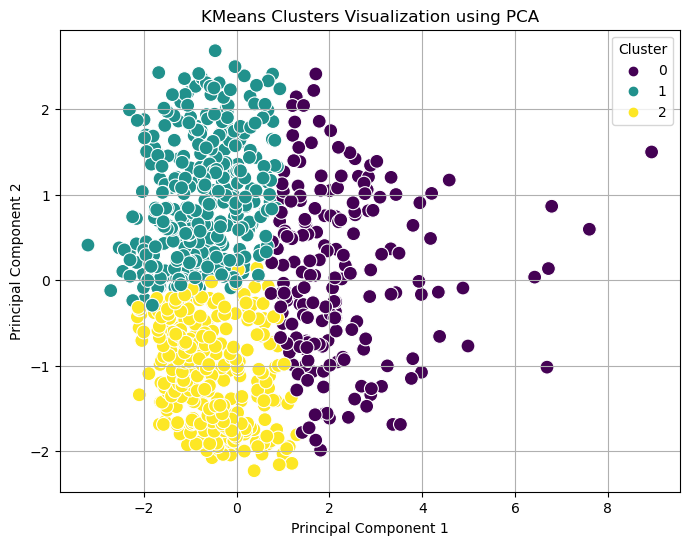

In [ ]:
# Visualize Clusters using PCA
# ===============================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clustering['Cluster'], palette='viridis', s=100)
plt.title("KMeans Clusters Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Supervised Learning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Load the dataset
file_path = "D:/Assignments/imdb_movie_dataset (2).csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


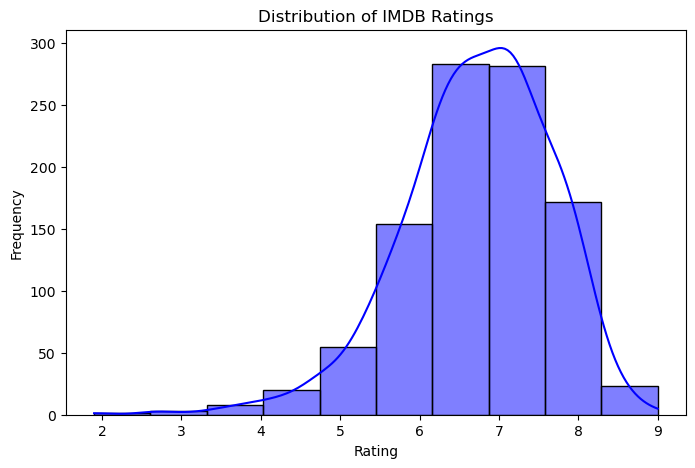

In [ ]:
# Visualizing IMDB Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=10, kde=True, color='blue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Drop all rows with at least one missing value
df.dropna(inplace=True)

# Verify that no missing values remain in the dataset
print(df.isnull().sum())


Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [ ]:

# Define the function to categorize ratings
def categorize_rating(rating):
    if 1 <= rating <= 3:
        return 'Flop'
    elif 4 <= rating <= 7:
        return 'Average/Niche'
    else:
        return 'Success'

# Apply transformation
df['Rating_2'] = df['Rating'].apply(categorize_rating)

# Display the transformed DataFrame
print(df)


     Rank                     Title                     Genre  \
0       1   Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
2       3                     Split           Horror,Thriller   
3       4                      Sing   Animation,Comedy,Family   
4       5             Suicide Squad  Action,Adventure,Fantasy   
..    ...                       ...                       ...   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                 Project X                    Comedy   
996   997           Hostel: Part II                    Horror   
997   998    Step Up 2: The Streets       Drama,Music,Romance   
999  1000                Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...     

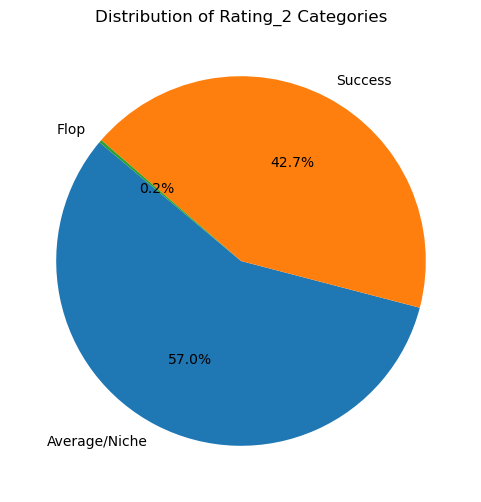

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Plot a pie chart of the 'Rating_2' distribution
category_counts = df['Rating_2'].value_counts()

plt.figure(figsize=(6, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating_2 Categories')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()


In [ ]:
# Encode and Scale Features
#   - Genre is categorical, so we need OneHotEncoder.
#   - Numeric columns will be scaled using StandardScaler.
# Importing the neccesary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Selecting relevant features for modeling
numeric_features = ['Runtime (Minutes)', 'Revenue (Millions)', 'Metascore', 'Votes']
categorical_features = ['Genre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the Data into Train/Test Sets
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Fit the Preprocessor on the Training Data, Transform Both Train and Test
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# View train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in training set:\n", y_train.value_counts())

Training set shape: (800, 195)
Test set shape: (200, 195)
Target distribution in training set:
 Rating_2
Average/Niche    470
Success          328
Flop               2
Name: count, dtype: int64


Random Forest Accuracy: 0.805

Classification Report (Random Forest):
                precision    recall  f1-score   support

Average/Niche       0.83      0.85      0.84       120
         Flop       0.00      0.00      0.00         1
      Success       0.77      0.75      0.76        79

     accuracy                           0.81       200
    macro avg       0.53      0.53      0.53       200
 weighted avg       0.80      0.81      0.80       200



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


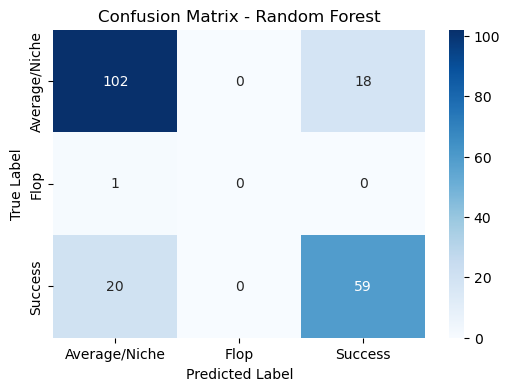

In [ ]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


SVM Accuracy: 0.805

Classification Report (SVM):
                precision    recall  f1-score   support

Average/Niche       0.83      0.84      0.84       120
         Flop       0.00      0.00      0.00         1
      Success       0.76      0.76      0.76        79

     accuracy                           0.81       200
    macro avg       0.53      0.53      0.53       200
 weighted avg       0.80      0.81      0.80       200



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


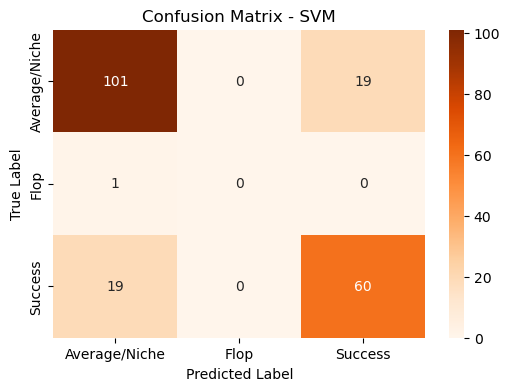

In [ ]:
# Import Libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the Model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Generative AI

In [ ]:
pip install --upgrade tokenizers --user

In [4]:
# Generative AI Phase 4 Notebook
# ============================================
# Movie Success Prediction using OpenChat 3.5 (HuggingFace Transformers)

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Step 1: User Interaction - Collect detailed inputs
print("Welcome to the Movie Success Predictor!")

main_character = input("Who is the main character? ")
movie_genre = input("What is the movie's genre? ")
estimated_budget = input("What is the estimated budget (in dollars)? ")
expected_runtime = input("What is the expected runtime (in minutes)? ")
target_audience = input("What is the target audience (kids, teens, adults)? ")
production_company = input("Production Company name? ")

# Combine user answers into a movie description
user_movie_description = (
    f"Main Character: {main_character}\n"
    f"Genre: {movie_genre}\n"
    f"Estimated Budget: {estimated_budget} dollars\n"
    f"Expected Runtime: {expected_runtime} minutes\n"
    f"Target Audience: {target_audience}\n"
    f"Production Company: {production_company}\n"
)

# Step 2: Define two prediction templates
TEMPLATE_1 = (
    "You are an expert movie industry analyst. Based on the following movie information, predict whether the movie will be a box office success or failure. Explain your reasoning clearly.\n\nMovie Details:\n{user_input}"
)

TEMPLATE_2 = (
    "As a top AI entertainment predictor, review the following movie concept and predict its financial and critical success chances. Provide supporting points for your prediction.\n\nMovie Information:\n{user_input}"
)

# Step 3: Load OpenChat 3.5 Model
model_name = "openchat/openchat-3.5-0106"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")

# Step 4: Apply Template 1
input1 = TEMPLATE_1.format(user_input=user_movie_description)
output1 = generator(input1, max_length=400, do_sample=True)[0]['generated_text']
print("\n--- Template 1 Prediction ---\n", output1)

# Step 5: Apply Template 2
input2 = TEMPLATE_2.format(user_input=user_movie_description)
output2 = generator(input2, max_length=400, do_sample=True)[0]['generated_text']
print("\n--- Template 2 Prediction ---\n", output2)


Welcome to the Movie Recommendation Assistant!


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

KeyboardInterrupt: 